# 1. How to choose optimal K


We can talk about how to choose k in k means clustering. Given data how can we decide how many clusters we want to create?So if its a 2d data its straight forward we just try and plot it and if we plot it it will be very visible to us how many clusters we should create.But in general data will not be 2d, you will have a lot of features in our data.  
  
Now how can we find how many clusters we want to create? So we really need to answer how to choose k?  
1. We would like to have points in same cluster should be nearby.  
2. Points in different clusters should be far away.  
For eg, we are given data like below,
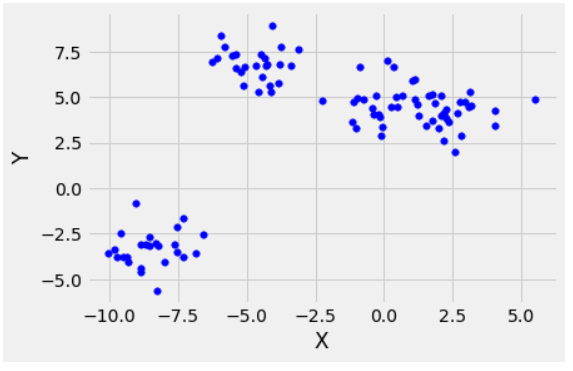

For k = 2 is a decent answer here because we can consider points within (-5.0, 0.0) as one cluster and points after -7.0 in x axis as another cluster.  
K = 3 is a good answer as well as we can clearly see it. Anything below 2 and 3 will give us a low score. Whataever metric we are trying to get it should get a low score.  
  
So we want a metric which gives us high score for k = 3. So it should somehow not just look at the absolute distances of points within the cluster or outside the cluster, it should somehow look at the comparison between two.   
  
If we are very very close points in our own cluster, thats great. But if we are very very far away, thats bad and should be in different cluster.   
  
So we are looking at the metric called **Silhouette** and it will use the intuition that we just summarized, that the points nearby should be in the same cluster and points which are far away should be in the different cluster and we will try to use the relative score instead of the absolute value.

# 2. Silhoutte Algorthm to choose k


Silhoutte method helps us to find out how many cluster we should be making in this data. It defines 3 values.  
1. a(i) = a(i) is the average distance of point i from all points in same cluster as i.  
2. b(i) = average distance of point i from all points in the neighbouring cluster.    
  
Neighbouring clustering means for particular point i, find the avg distance from each cluster. Lets say we have 4 clusters c1 to c4, and i is the part of cluster c1, then we will find distance of i from all the datapoints of cluster c2 taking avg of it.Similarly with c3 and c4 and the neighbouring cluster is the one which has the minimum distance. Lets say that distance is b(i).   
So we want to say that we are far away from every points, so we are not going to look at all the clusters, we are going to look at the clusters which are closest to me, which is the best cluster for me. point i which is not in c1, it should go to c2 because its our neighbour. So thats why we are going to compare a(i) and b(i). And we are going to define final value which is silhoutte of i which is $$s(i) = \frac{b(i) - a(i)}{max(b(i), a(i))}$$  
  
We are dividing by $max(b(i), a(i))$ to scale it, so that we can actually compare values. The numerator is some value which doesnt makes any sense.  
 
$$s(i) = \frac{b(i) - a(i)}{max(b(i), a(i))} $$   
 $$ = 1 - \frac{a(i)}{b(i)} , \quad if \ b(i) > a(i), \ if \ b(i) >>> a(i), then \ s(i) \approx 1   $$
   $$  0 , \quad  if \ a(i) = b(i)$$
   $$ \frac{b(i)}{a(i)} - 1 \quad , if\ a(i) > b(i) , \ in \ this \ case,\ maximum \ s(i) \ can \ reach \ is \ 1 \ so, s(i) \leq 1$$ 
   $$if \ a(i) >>> b(i), \ then \ s(i) \approx  -1$$
   
   $$So, \ -1 \leq s(i) \leq 1$$


So we want in our case to be in $1 - \frac{a(i)}{b(i)}$ where b is greater than a, and we want our point to be close to 1.  
So we want to find the silhoutte code for all the points and take the avg that will give us the silhoutte score for the clustering that we have done. So we can do two means find the silhoutte score, for three means find the silhoutte score, and if we try and plot it, it will get max value at some point, that will be the best value of k.  
$s(i) = 0, \quad if \ cluster \ containing \ point \ i \ has \ no \ other \ datapoint$  
  
explore make_blob

# 3. Intro to K Medoids


Difference between k-means and k-medoids is  
1. It wants that we make an actual point in data as medoids which is similar to centroid means in k-means.  
2. It says that we use $l_1$ distance instead of $l_2$. Difference between $l_1$ and $l_2$ distance is lets say we have two points and distance between them is 2. So in $l_2$ distance it will become 4 while in $l_1$, it will remains the same. Its okay to make small mistakes in $l_2$ distance, but making big mistake  will tremendously increases the amount of error we are making. Why $l_2$ is okay with making small mistakes? Because in case of 5 - 7 as distances, cost will double up.

One is we will be using medoids, which are actual datapoints, second is we will be using $l_1$ distances instead of $l_2$.

# 4. K Mediods Algorithm


In k-medoids, we will do the following things  
**1. select k random medoids.**  
**2. Assign each datapoints one of the clusters depending upon their distance to medoids.**  
**3. Find replacement for our current medoids.**
**4. Repeat 2 and 3 by max-iteration times.**

  
The idea is, lets say we pick the two medoids, we created two clusters, what we really need to do is we want to find the new centroid value, so we want to find the replacement for this(the medoid). For that, we need to go to each of the points in the same cluster. So how do we define if the replacement is good or not? So we need to define the score.So score of a particular cluster is (1)we need to go to each cluster, (2)then we need to go to each point belonging to that cluster, lets say the medoid of the cluster is $m_i$,(3)we find the $l_1$ distance between $d_j$ and $m_i$ where $d_j$ is the point in the cluster. So it can be denoted as  $$\sum_{i = 1}^k \sum_{d_j \ \epsilon \ i} |d_j - m_i|$$

Lets say we want to see if a particular point is a good replacement, we will not find distance between that point and the other points within same cluster, but we will find the distance of this point with all the points in our data and see if this was the new medoid alongside with the prev one, what would be the new clustering and what would be the new score(score will be calculated by taking all the datapoints in consideration).

# 5. Intro to Hierarchical Clustering


Hierarchical clustering, is an unsupervised learning algorithm that
groups similar objects into groups called clusters.

There are ways to create cluster hierarchy:-
1. Agglomerative (bottom up approach)
2. Divisive (top down approach)

Agglomerative clustering starts by treating each data point
as a separate cluster.

Then the algorithm finds out which 2 clusters are the most similar and
groups them to form a new cluster.
It repeats this process till all the clusters are merged to form a single
cluster.

The metric used to calculate the similarity between the clusters can be
the Manhattan or Euclidean distance.
The choice of the metric is completely arbitrary and there is no reason
to choose one over the other.
But the outcome might be different for each metric, so choose the one
that helps you gain more insight into your data.

The ways to combine clusters are calculating distance between the:-
1. Centroids of each clusters (Average of each cluster)
2. Closest points of each clusters (Single Linkage)
3. Farthest points of each clusters (Complete Linkage)

Divisive clustering is basically the opposite of Agglomerative.
You first have one huge cluster and then you split it into two most
unsimillar clsuters.
You repeat this process till you have one cluster for each data point.


Having Information in this type of cluster is very useful for eg, ads. Lets say we want to reach our ads for broader audience. Lets say we have 5 people who really like our ads and we want to show it to people who are similar to these 5 people and they are more likely to click our ad. So if we want to reach out to 100 people we can decide we want to target small cluster. Lets say if we want to target 10000 people, we will go to the large cluster.   
  
Building large clusters can be time consuming. There are two ways of building it as mentioned above. But how can we measure distance between two clusters? There are many ways. One is the max distance. It is equal to $max(d(x, y) \  x \ \epsilon \ c_1, \ y \ \epsilon \ c_2).$   
We can also use min distance which is $min(d(x, y) \  x \ \epsilon \ c_1, \ y \ \epsilon \ c_2)$.  
We can also take the average as well.  

# 6. Top Down/Divisive Approach


Top down approach says that we have all the data. And lets divide the data into two parts $s_1$ and $s_2$. And then we can further divide into more and we will keep doing it till we reach to the leaf node which will be just single datapoints. So the interesting part is how should we calculate $s_1$ and $s_2$? We can divide n datapoints into two parts in *exponential no of ways*.   
  
So for all possible subsets $s_1$ and $s_2$, we can find the distance between them and pick that break in $s_1$ and $s_2$ which leads to the maximum distance. Thats going to be very very expensive and its not going to be practical for us to do that for any decent amount of data. What we generally do is we dont generally try and pick the best clustering, but we do is we use something like k means that will help us split the data into two clusters. So k-means doesnt gurantee us thatit has the best clusters. So what we do is we use something like kmeans and kmedoids to break our data into two parts. And then we will apply kmeans on individual clusters as well so that we keep breaking them into smaller smaller parts and eventually we will get our complete tree. If we implement kmeans it will be pretty straight forward implementation to implement this approach.

# 7. Bottom Up/Agglomerative Approach


It is called Agglomerative because it is aggregating stuff toegther to reach at all the combined data. The idea is each an every point is an individual cluster and now we try and combine two of these points into one. Now this is a new candidate for us. And now we have n - 1 clusters.

So again we pick two clusters which is closest to each other and we merge them. How do we know it is closest to each other? it is which has the minimum distances. We can also take which has the max distance as well or we can decide accordingly.  
  


This algorithm requires $O(n^2)$ Space and $O(n^3)$ time. It is very expensive algorithm. We an try and optimize it with heaps.

It is highly recommended to use it in sklearn. But we dont have top-down approach and k-medoids implemented in sklearn as of now (might be added uptil now).